In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import random
import pandas as pd
from sklearn.svm import SVC
import copy
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
import seaborn

In [2]:
#Reference : https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/
#Reference : https://github.com/YaroslavAveryanov/SVM/blob/master/svm.py
#https://www.rapidtables.com/web/color/RGB_Color.html#color-table

In [3]:
f = open("Dataset/glass.txt")
g = f.read().split('\n')

In [4]:
def convert_label(label):
    if label == "M":
        return 1
    return 0

In [5]:
# def convert_float(temp):
#     temp1=[]
#     for i in range(len(temp)):
#         temp1.append(float(temp[i]))
#     return temp1

In [6]:
def convert_float(temp):
    temp1=[]
    counter=1
    temp = temp[:-1]
   
    for i in range(len(temp)):
        
        if int(temp[i].split(':')[0])==counter:
            
            temp1.append(float(temp[i].split(':')[1]))
            counter = counter+1 
        else:
            for j in range(counter,int(temp[i].split(':')[0])):
                
                temp1.append(0)
            temp1.append(float(temp[i].split(':')[1]))
            counter = int(temp[i].split(':')[0]) +1
          
    return temp1

In [7]:
#For the breast cancer data
# data = []
# label=[]
# for i in g:
#     k = i.split(',')
#     label.append(convert_label(k[1]))
#     temp=[]
#     data.append(convert_float(k[2:]))
    
    

In [8]:
#For the glass data
data = []
label=[]
for i in g:
    k = i.split(' ')
    label.append(int(k[0]))
    temp=[]
    data.append(convert_float(k[1:]))

In [9]:
# #Dataset Description for Breast Cancer
# count1=0
# count2=0
# for  i in label:
    
#     if i==0:
#         count1= count1+1
#     else:
#         count2=count2+1
# print("Dataset has M : ",count2)
# print("Dataset has B :",count1)
# print("Datset has features : ",len(data[0]))

# Dataset Visualisation

In [10]:
#Dataset description for Glass dataset
dict_label={}
for i in range(len(label)):
    try:
        dict_label[label[i]] = dict_label[label[i]]+1
    except:
        dict_label[label[i]]=1
print("Class distribution : ",dict_label)

Class distribution :  {1: 70, 2: 76, 3: 17, 5: 13, 6: 9, 7: 29}


In [11]:
labels = list(dict_label.keys())

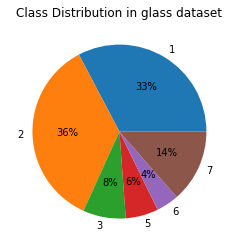

In [12]:
index = np.arange(len(list(dict_label.keys())))
plt.pie(list(dict_label.values()),labels=labels,autopct='%1.0f%%')
labels = list(dict_label.keys())
plt.title("Class Distribution in glass dataset")
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 214 samples in 0.000s...
[t-SNE] Computed neighbors for 214 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 214 / 214
[t-SNE] Mean sigma: 0.258631
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.402542
[t-SNE] KL divergence after 300 iterations: 0.367665


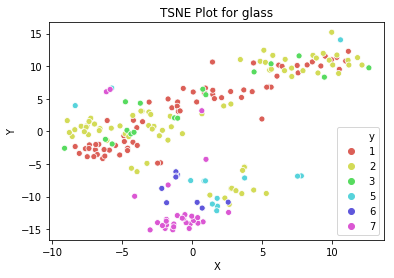

In [13]:
#TSNE Plot for glass dataset
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data)

df_subset = pd.DataFrame()
df_subset['X'] = tsne_results[:,0]
df_subset['y']=label
df_subset['Y'] = tsne_results[:,1]
plt.figure(figsize=(6,4))
plt.title("TSNE Plot for glass")
sns.scatterplot(
    x="X", y="Y",
    hue="y",
    palette=sns.color_palette("hls", 6),
    data=df_subset,
    legend="full",
    alpha=1.0
)

# Data preprocessing

In [14]:
def data_split(data,label,train_test_split):
    '''Make random shuffle of data and split into train and test set
    Parameters are as:
    data: whole dataset to split
    label : whole labels corresponding to each data points
    train_test_split : ration of split i.e, for ex: 10/7, if want to split 7:3
    '''
    split = int(len(data)/train_test_split)
    data_sample=[]
    for i in range(len(data)):
        temp=[]
        temp.append(data[i])
        temp.append(label[i])
        data_sample.append(temp)
    data_sample = random.sample(data_sample,len(data_sample))
    data=[]
    label=[]
    for i in range(len(data_sample)):
        data.append(data_sample[i][0])
        label.append(data_sample[i][1])
    return data[:split],label[:split],data[split:],label[split:],data,label

In [15]:
train_data,train_label,test_data,test_label,data,label = data_split(data,label,1.444)

# SVM Baseline Code 

In [16]:
#global initialisation
gamma = 0.5
bias = 1

In [17]:
def confusion_matrix(labels,test_label,label_pred,class_num,kernel,g,types):
    '''To get the confusion matrix for given details
    Parameters are as :
    labels : set of label 
    test_label : testing label 
    label_pred: predicted labels
    class_num = number of classes'''
    confusionmatrix=[]
    temp = []
    for i in range(class_num):
        temp.append(0)
   
    for i in range(len(labels)):
        confusionmatrix.append(temp)
        temp=copy.deepcopy(temp)
    for i in range(len(test_label)):
        confusionmatrix[labels.index(test_label[i])][labels.index(label_pred[i])]=confusionmatrix[labels.index(test_label[i])][labels.index(label_pred[i])]+1
    str_kernel = ""
    if kernel ==gaussian_kernel:
        str_kernel = "G"
    else:
        str_kernel = "L"
#     string_title = types+",kernel:"+str_kernel + " g:" + str(g)
#     plt.title(string_title)
    plt.show(seaborn.heatmap(confusionmatrix,annot=True,fmt="d"))
    print("____________________________________________")

In [18]:
def gaussian_kernel(X,Y):
    '''Gaussian kernel function 
    Parameters are as:
    X : first input 
    Y: second input'''
    global gamma
    K = np.zeros((X.shape[0],Y.shape[0]))
    for i,x in enumerate(X):
        for j,y in enumerate(Y):
            K[i,j] = np.exp(-1*gamma*np.linalg.norm(x-y)**2)
    return K

In [19]:
def linear_kernel(X,Y):
    '''Linear kernel function 
    Parameters are as:
    X : first input 
    Y: second input'''
    global bias
    dot_value = np.inner(X,Y)
    return dot_value + bias

In [20]:
def baseline(data,train_label,test,test_label,kernel,g):
    '''Method to give train and test accuracy by giving parameters as
    data: train data 
    train_label: label for train data
    test: test data
    test_label: label for test data
    kernel : Either linear or gaussian kernel
    g: gamma value for gaussian kernel'''
    global labels
    global gamma
    gamma = g
    svc = SVC(kernel=kernel,random_state=0,probability=True,gamma=gamma)
    svc = svc.fit(data,train_label)
    score1  = svc.score(test,test_label)
    predict = svc.predict(test)
    print("\n")
    confusion_matrix(labels,test_label,predict,6,kernel,g,"Baseline")
    score2 = svc.score(data,train_label)
    print("Training accuracy : ",score2," & Testing Accuracy : ",score1)
    return svc,score1,score2

In [ ]:
#Print the results for different kernels for baselines results
list1 = [1,10,100,1000,10000]
print("For gaussian kernel ;Baseline ")
for i in list1:
    print("For kernel : ",i)
    print("_________________________________")
    svc,score,_ = baseline(train_data,train_label,test_data,test_label,gaussian_kernel,i)
    
print("-------------------------------------------------------------")
print("For linear kernel ;Baseline ")
svc,score,_ = baseline(train_data,train_label,test_data,test_label,linear_kernel,1)

# OVA Technique

In [21]:
def accuracy(predict,truth):
    '''Method to calculate the accuracy
    predict : list of predicted class
    truth : list of ground truth '''
    count =0
    for i in range(len(predict)):
        if predict[i]==truth[i]:
            count =count +1
    return count/len(predict)

In [22]:
def making_data_ova(class1,data,label):
    '''Method to make the data as correpond to OVA technique
    Parameters are as:
    class1 : class for which making 
    data: train data
    label: train label '''
    data_f = []
    label_f = []
    class_d = []
    for i in range(len(label)):
        if class1 == label[i]:
            
            data_f.append(data[i])
            label_f.append(1)
        else:
         
            data_f.append(data[i])
            label_f.append(0)
    return data_f,label_f

In [23]:
def OVA(train_data,test_data,train_label,test_label,labels,g,kernel):
    '''Method for One vs One / One vs All for SVM 
    Parameters are as :
    train_data: train data
    test_data: test data
    test_label: test label
    labels : labels set'''
    global gamma
    gamma = g
    svm_ova = []
    for i in range(len(labels)):

        data_final,label_final = making_data_ova(labels[i],train_data,train_label)
        svc = SVC(kernel=kernel,probability=True,random_state=0,gamma=gamma)
        svc = svc.fit(data_final,label_final)
        svm_ova.append([svc,labels[i]])
    predict = []
    for i in test_data:
        predict_p=[]
        for j in range(len(svm_ova)):
            p =svm_ova[j][0].predict_proba([i])
            predict_p.append(p[0][1])
        predict.append(labels[np.argmax(np.array(predict_p))])
    score1 = accuracy(predict,test_label)
    #Confusion Matrix
    ###Remove comment when necessary 
#     print("\n")
#     confusion_matrix(labels,test_label,predict,6,kernel,g,"OVA")
    ###
    predict = []
    for i in train_data:
        predict_p=[]
        for j in range(len(svm_ova)):
            p =svm_ova[j][0].predict_proba([i])
            predict_p.append(p[0][1])
        predict.append(labels[np.argmax(np.array(predict_p))])
    score2 = accuracy(predict,train_label)
#     print("Testing Accuracy : ",score1)
    print("Training acurracy : ",score2," & Testing Accuracy : ",score1)
    return svm_ova,predict,score1,score2
        

In [ ]:
#Print the results for different kernels for baselines results
list1 = [1,10,100,1000,10000]
print("For gaussian kernel OVA ")
for i in list1:
    print("For kernel : ",i)
    print("_________________________________")
    svm_ova,_,_,_ = OVA(train_data,test_data,train_label,test_label,labels,i,gaussian_kernel)
   
    
print("-------------------------------------------------------------")
print("For linear kernel OVA ")
svm_ova,_,_,_ = OVA(train_data,test_data,train_label,test_label,labels,1,linear_kernel)


# AVA Technique

In [24]:
def making_data_ava(class1,class2,data,label):
    '''Method to make the data as correpond to OVA technique
    Parameters are as:
    class1 : class for which making 
    data: train data
    label: train label'''
    data_f=[]
    label_f =[]
    for i in range(len(label)):
        if class1 == label[i]:
    
            data_f.append(data[i])
            label_f.append(class1)
        elif class2==label[i]:
    
            data_f.append(data[i])
            label_f.append(class2)
    return data_f,label_f

In [25]:
def classifiers_ava(data,train_label,g,kernel):
    '''Method classifier to get the AVA classifiers 
    Parameters are as :
    data: train data
    train_label : train label
    g: gamma
    kernel : kernel i.e, either gaussian or linear kernel'''
    global gamma
    gamma = g
    global labels
    classifiers = []
    for i in range(len(labels)):
        for j in range((i+1),len(labels)):
            if i!=j:
                temp=[labels[i],labels[j]]
                data_final,label_final = making_data_ava(labels[i],labels[j],data,train_label)

                svc = SVC(kernel=kernel,probability=True,random_state=0,gamma=gamma)
                svc = svc.fit(data_final,label_final)
                classifiers.append(svc)
    return classifiers

In [26]:
def prediction_ava(classifiers,test_data,test_label,train_data,train_label,kernel):
    '''Method to predict AVA classifiers 
    Parameters are as :
    classifiers: classifiers get from classifiers_ava() function 
    test_data: test data
    test_label : test label
    train_data : train data
    train_label : train label
    '''
    predict=[]
    for k in train_data:
        majority_p=[]
        majority=[]
        for l in range(len(labels)):
            majority.append(0)
        for l in range(len(labels)):
            majority_p.append(0)
        for i in range(len(classifiers)):
            index1 = labels.index(classifiers[i].predict([k]))
            majority[index1] = majority[index1] +1
            majority_p[index1] = majority_p[index1] +np.max(classifiers[i].predict_proba([k]))
        predict.append(labels[np.argmax(majority)])
    score1 = accuracy(predict,train_label)
    predict_train  = copy.deepcopy(predict)
    predict=[]
    for k in test_data:
        majority_p=[]
        majority=[]

        for l in range(len(labels)):
            majority.append(0)
        for l in range(len(labels)):
            majority_p.append(0)
        for i in range(len(classifiers)):
    #         print(k)
    #         print(classifiers[i].predict([k]))
            index1 = labels.index(classifiers[i].predict([k]))
    #         print(classifiers[i].predict([k]))
            majority[index1] = majority[index1] +1
            majority_p[index1] = majority_p[index1] +np.max(classifiers[i].predict_proba([k]))

        predict.append(labels[np.argmax(majority)])
    score2 = accuracy(predict,test_label)
    print("\n")
    confusion_matrix(labels,test_label,predict,6,kernel,g,"AVA")
    print("Training acurracy : ",score1," & Testing Accuracy : ",score2)
    return predict_train,score2,score1

In [27]:
def AVA(train_data,test_data,train_label,test_label,g,kernel):
    '''Method AVA which return the classifiers 
    Parameters are as :
    train_data : train data
    test_data : test data
    train_label : train label 
    test_label : test label
    g : gamma
    kernel : kernel either gaussian or linear kernel
    '''
    classifiers = classifiers_ava(train_data,train_label,g,kernel)
    predict_train,score1,score2 = prediction_ava(classifiers,test_data,test_label,train_data,train_label,kernel)
    return classifiers,score1,score2

In [ ]:
#Print the results for different kernels for baselines results
list1 = [1,10,100,1000,10000]
print("For gaussian kernel AVA ")
for i in list1:
    print("For kernel : ",i)
    print("_________________________________")
    classifiers,_,_ = AVA(train_data,test_data,train_label,test_label,i,gaussian_kernel)
   
    
print("-------------------------------------------------------------")
print("For linear kernel AVA ")
classifiers,_,_ = AVA(train_data,test_data,train_label,test_label,1,linear_kernel)

# Incremental Learning

In [ ]:
# data_sample=[]
# for i in range(len(data)):
#     temp=[]
#     temp.append(data[i])
#     temp.append(label[i])
#     data_sample.append(temp)
# data_sample = random.sample(data_sample,len(data_sample))
# data=[]
# label=[]
# for i in range(len(data_sample)):
#     data.append(data_sample[i][0])
#     label.append(data_sample[i][1])

In [ ]:
batch_size=int(len(train_data)/10)
counter =0
incremental_supports = []
incremental_labels = []
while counter<10:
    
    data_s = train_data[counter*batch_size:(counter+1)*batch_size]
    label_s = train_label[counter*batch_size:(counter+1)*batch_size]
    data_s = data_s + incremental_supports
    label_s = label_s + incremental_labels
    svc = SVC(kernel=gaussian_kernel,probability=True,random_state=0)
    svc = svc.fit(data_s,label_s)
    supports = svc.support_
    incremental_supports = []
    incremental_labels = []
    for  i in range(len(supports)):
        incremental_supports.append(data_s[supports[i]])
        incremental_labels.append(label_s[supports[i]])
        
    
    counter = counter +1
    

In [ ]:
print("Training accuracy : ",svc.score(train_data,train_label)," & Testing accuracy : ",svc.score(test_data,test_label))

# Question 3

# Online SVM Learning


In [28]:
def online_learning_svm(data,label,kernel,train_test_split,train_dynamic_split,g):
    '''Online SVM Learning Method 
    data : dataset on which we are doing the online svm i.e, it will be splitted into train, dynamic and test data with correponding label
    label : dataset correponding labels 
    train_test_split : split ratio for train and test split i.e, for ex: 10/7, if want to split 7:3
    train_dynamic_split : split ratio for train and dynamic split for train data which we got using train_test_split i.e, for ex: 10/7, if want to split 7:3
    '''
    # Converting the train data, valid data and test data for the datset to do online learning 
    global gamma
    gamma = g
    
    train_len = int(len(data)/train_test_split)
    train_data = data[:train_len]
    train_label_data = label[:train_len]
    test_data = data[train_len:]
    test_label_data = label[train_len:]
    dynamic_data_size = int(train_len/train_dynamic_split)
    train_data_s = train_data[:dynamic_data_size]
    label_train_data_s = train_label_data[:dynamic_data_size]
    dynamic_data  = train_data[dynamic_data_size:]
    label_dynamic_data = train_label_data[dynamic_data_size:]
    svc = SVC(kernel=kernel,probability=True,random_state=0,gamma= gamma)
    svc = svc.fit(train_data_s,label_train_data_s)
    train_data_copy = copy.deepcopy(train_data)
    train_label_data_copy = copy.deepcopy(train_label_data)
    for i in range(len(dynamic_data)):
        '''Loop for dynamic data Online learming for SVM'''
        if svc.predict([dynamic_data[i]]) != label_dynamic_data[i]:
            supports = svc.support_
            incremental_supports = []
            incremental_labels = []
            for  j in range(len(supports)):
                incremental_supports.append(train_data[supports[j]])
                incremental_labels.append(train_label_data[supports[j]])
            incremental_supports.append(dynamic_data[i])
            incremental_labels.append(label_dynamic_data[i])
            train_data = copy.deepcopy(incremental_supports)
            train_label_data = copy.deepcopy(incremental_labels)
            svc = SVC(kernel=kernel,probability=True,random_state=0,gamma= gamma)
            svc = svc.fit(incremental_supports,incremental_labels)
        if i%10==0:
        
            print("Testing Accuracy @",(i+1)," : ",svc.score(test_data,test_label_data))
    print("\n")
    predict_data = svc.predict(test_data)
    confusion_matrix(labels,test_label,predict_data,6,kernel,g,"OnlineSVM")
    print("Training Accuracy : ",svc.score(train_data_copy,train_label_data_copy)," & Testing Accuracy : ",svc.score(test_data,test_label_data))
    return svc
                
        
    

In [ ]:
#Print the results for different kernels for baselines results
list1 = [1,10,100,1000,10000]
print("For gaussian kernel, Online SVM Learning ")
for i in list1:
    print("For kernel : ",i)
    print("_________________________________")
    svc = online_learning_svm(data,label,gaussian_kernel,1.44,1.44,i)
   
    
print("-------------------------------------------------------------")
print("For linear kernel OVA ")
svc = online_learning_svm(data,label,linear_kernel,1.44,1.44,10)



# K fold Cross Validation

In [29]:
def k_fold_cross_validation(k,train_data,train_label,test_data1,test_label1,types,kernel,g,labels):
    '''To do k fold cross validation 
    Parameters are as : 
    k : number of folds
    train_data : training data
    train_label : train label
    test_data1 : testing data
    test_label1 : testing label
    types : type of methodody i.e, OVA, AVA and baseline
    kernel : Either gaussian and linear kernel
    g : gamma for gaussian kernel 
    labels : labels set
    
    '''
    kf = KFold(n_splits=10)
    kf.get_n_splits(train_data)
    X = copy.deepcopy(np.array(train_data))
    y = copy.deepcopy(np.array(train_label))
    valid_acc =[]
    models = []
    for train_index, test_index in kf.split(train_data):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        if types =="Baseline":
            svc,score1,score2 = baseline(X_train,y_train,X_test,y_test,kernel,g)
            valid_acc.append(score1)
            models.append(svc)
        elif types =="OVA":
            svm_ova,_,score1,score2 = OVA(X_train,X_test,y_train,y_test,labels,g,kernel)
            valid_acc.append(score1)
            models.append(svm_ova)
        elif types =="AVA":
            svc,score1,score2 = AVA(X_train,X_test,y_train,y_test,g,kernel)
            valid_acc.append(score1)
            models.append(svc)
    index = np.argmax(np.array(valid_acc))
    svm_ova = models[index]
    predict = []
    if types =="OVA":
        for i in test_data1:
            
            predict_p=[]
            for j in range(len(svm_ova)):
                p =svm_ova[j][0].predict_proba([i])
                predict_p.append(p[0][1])
            predict.append(labels[np.argmax(np.array(predict_p))])
        score = accuracy(predict,test_label1)
        
        confusion_matrix(labels,test_label1,predict,6,kernel,g,"fold-ova")
    elif types =="AVA":
        classifiers = models[index]
        for k in test_data1:
            majority_p=[]
            majority=[]
            for l in range(len(labels)):
                majority.append(0)
            for l in range(len(labels)):
                majority_p.append(0)
            for i in range(len(classifiers)):
                index1 = labels.index(classifiers[i].predict([k]))
                majority[index1] = majority[index1] +1
                majority_p[index1] = majority_p[index1] +np.max(classifiers[i].predict_proba([k]))
            predict.append(labels[np.argmax(majority)])
        score = accuracy(predict,test_label1)
        confusion_matrix(labels,test_label1,predict,6,kernel,g,"fold-ava")
    elif types =="Baseline":
        svc = models[index]
        score = svc.score(test_data1,test_label1)
        predict = svc.predict(test_data1)
        confusion_matrix(labels,test_label1,predict,6,kernel,g,"fold-baseline")
    return score
        
    
    
        
    

In [ ]:
list1 = [1,10,100,1000,10000]
print("For gaussian kernel OVA ")
for i in list1:
    print("For kernel : ",i)
    print("_________________________________")
    score  = k_fold_cross_validation(10,train_data,train_label,test_data,test_label,"OVA",gaussian_kernel,i,labels)
    print("Testing Accuracy with best validation model " ,score)
    
print("-------------------------------------------------------------")
print("For linear kernel OVA ")
score  = k_fold_cross_validation(10,train_data,train_label,test_data,test_label,"OVA",linear_kernel,i,labels)
print(score)

# For Decision Boundary

In [30]:
def prediction_data(X,train_data, test_data,train_label,test_label,types,labels,kernel,g):
    '''To predict the data points using given model
    Parameteres are as : 
    X_train : train data 
    types : type of methodology either AVA, OVA, Simple model
    model: model used for predictions
    kernel : Either gaussian or linear kernel
    g : gamma for gaussian kernel'''
    predict = []
    if types == "OVA":
        
        svm_ova,predict_train,_,_ = OVA(train_data,test_data,train_label,test_label,labels,g,kernel)
        
        for i in X:
            
            predict_p=[]
            for j in range(len(svm_ova)):
                p =svm_ova[j][0].predict_proba([i])
                predict_p.append(p[0][1])
            predict.append(labels[np.argmax(np.array(predict_p))])
        pass
    elif types == "AVA":
        classifiers,_,_ = AVA(train_data,test_data,train_label,test_label,g,kernel)
   
        for k in X:
            majority_p=[]
            majority=[]
            for l in range(len(labels)):
                majority.append(0)
            for l in range(len(labels)):
                majority_p.append(0)
            for i in range(len(classifiers)):
                index1 = labels.index(classifiers[i].predict([k]))
                majority[index1] = majority[index1] +1
                majority_p[index1] = majority_p[index1] +np.max(classifiers[i].predict_proba([k]))
            predict.append(labels[np.argmax(majority)])
        pass
    elif types =="Baseline":
        svc,_,_ = baseline(train_data,train_label,test_data,test_label,kernel,g)
        predict = svc.predict(X)
        pass
    
    return np.array(predict)
    
    

In [31]:
def reduce_first_axis(X):
    Y = []
    for i in range(len(X)):
        Y.append(X[i][1:])
    return np.array(Y)

In [32]:
# https://towardsdatascience.com/decision-boundary-visualization-a-z-6a63ae9cca7d
def decision_boundary(X_train,y_train,test_data,test_label,types,kernel,g,flag):
    ''' To make decision boundary for model given with train data points
    Parameters are as :
    X_train : train data 
    types: which model it is .Either OVA, AVA or simple SVM
    model : Model to predict for train data points
    kernel : Either gaussian or linear kernel
    g: Gamma used for gaussian kernel
    flag: flag is True then, for train data; otherwise for test data'''
    
    # Plotting decision regions
    if flag == True:
        
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    else:
        x_min, x_max = test_data[:, 0].min() - 1, test_data[:, 0].max() + 1
        y_min, y_max = test_data[:, 1].min() - 1, test_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X = np.concatenate((np.ones((xx.shape[0]*xx.shape[1],1))
                     ,  np.c_[xx.ravel(), yy.ravel()]), axis = 1)
    # To predict the class label for data points
    X = reduce_first_axis(X)

    h =prediction_data(X,X_train,test_data,y_train,test_label,types,labels,kernel,g)
    h = h.reshape(xx.shape)
    plt.contourf(xx, yy, h)
    str_data = ""
    if flag ==True:
        str_data = "For Training;"
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                                      s=30, edgecolor='k')
        
    else:
        str_data = "For Testing;"
        plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label,
                                      s=30, edgecolor='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    str_kernel = ""
    if kernel ==gaussian_kernel:
        str_kernel = "gaussian"
    else:
        str_kernel = "linear"
 
    string_title = "For "+ types + " & "+str_data+ " kernel : " + str_kernel + " gamma : " + str(g)
    plt.title(string_title)
    plt.show()

In [33]:
train_data1,train_label,test_data1,test_label,data,label = data_split(data,label,1.444)
pca=PCA(n_components=2)
train_data=pca.fit_transform(train_data1)
test_data = pca.transform(test_data1)

# For training data

For linear kernel : Baseline SVM 




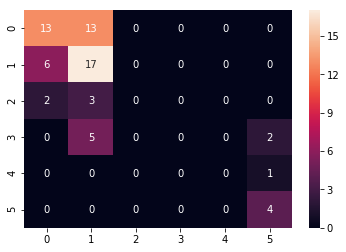

____________________________________________
Training accuracy :  0.5202702702702703  & Testing Accuracy :  0.5151515151515151


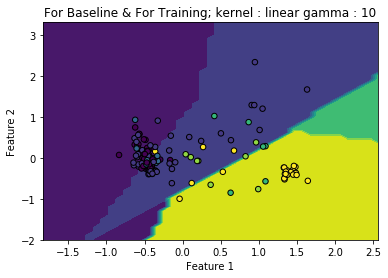

__________________________________________________
For gaussian kernel : Baseline SVM 




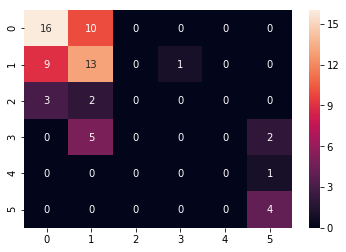

____________________________________________
Training accuracy :  0.581081081081081  & Testing Accuracy :  0.5


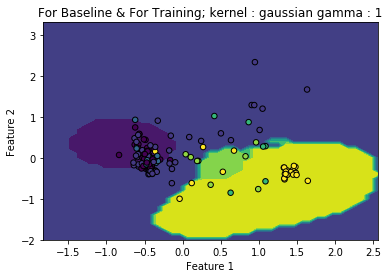

_________________________________________________




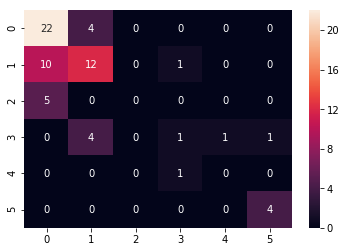

____________________________________________
Training accuracy :  0.7364864864864865  & Testing Accuracy :  0.5909090909090909


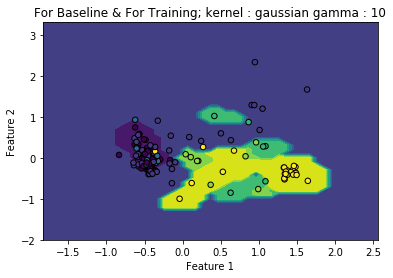

_________________________________________________




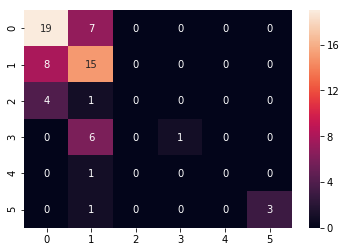

____________________________________________
Training accuracy :  0.8513513513513513  & Testing Accuracy :  0.5757575757575758


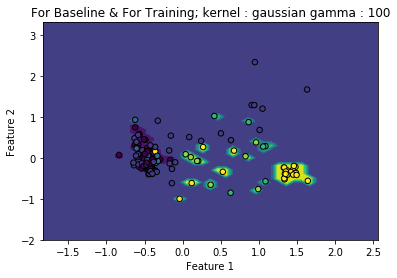

_________________________________________________




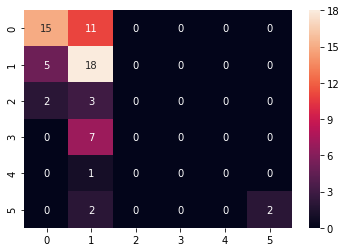

____________________________________________
Training accuracy :  0.9391891891891891  & Testing Accuracy :  0.5303030303030303


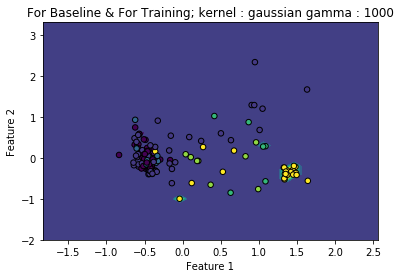

_________________________________________________




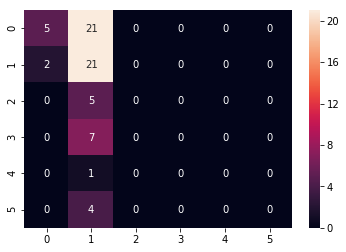

____________________________________________
Training accuracy :  0.9932432432432432  & Testing Accuracy :  0.3939393939393939


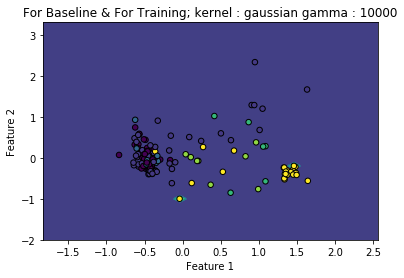

_________________________________________________


In [39]:
# For getting decision boundary
print("For linear kernel : Baseline SVM ")
decision_boundary(train_data,train_label,test_data,test_label,"Baseline",linear_kernel,10,True)
print("__________________________________________________")
list1 =[1,10,100,1000,10000]
print("For gaussian kernel : Baseline SVM ")
for i in list1:
    
    decision_boundary(train_data,train_label,test_data,test_label,"Baseline",gaussian_kernel,i,True)
    print("_________________________________________________")

For linear kernel : OVA SVM 
Training acurracy :  0.5202702702702703  & Testing Accuracy :  0.45454545454545453


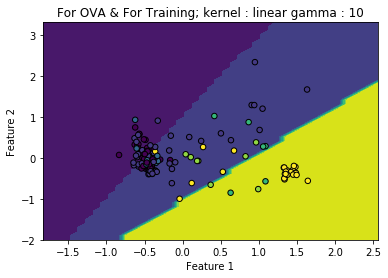

__________________________________________________
For gaussian kernel : OVA SVM 
Training acurracy :  0.5878378378378378  & Testing Accuracy :  0.5606060606060606


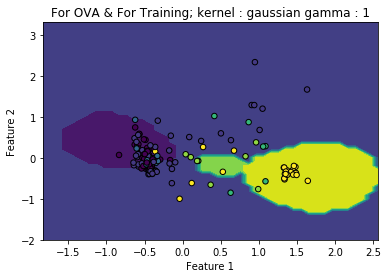

_________________________________________________
Training acurracy :  0.6959459459459459  & Testing Accuracy :  0.5757575757575758


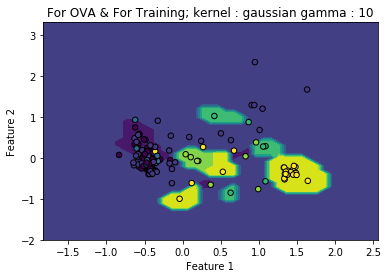

_________________________________________________
Training acurracy :  0.8513513513513513  & Testing Accuracy :  0.5757575757575758


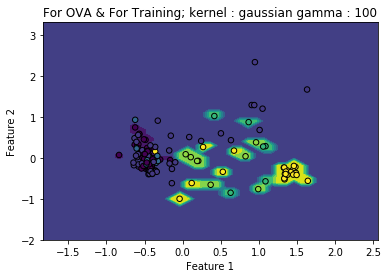

_________________________________________________
Training acurracy :  0.9459459459459459  & Testing Accuracy :  0.5757575757575758


In [ ]:
# For getting decision boundary
print("For linear kernel : OVA SVM ")
decision_boundary(train_data,train_label,test_data,test_label,"OVA",linear_kernel,10,True)
print("__________________________________________________")
list1 =[1,10,100,1000,10000]
print("For gaussian kernel : OVA SVM ")
for i in list1:
    
    decision_boundary(train_data,train_label,test_data,test_label,"OVA",gaussian_kernel,i,True)
    print("_________________________________________________")

For linear kernel : AVA SVM 




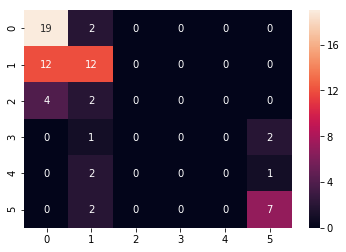

____________________________________________
Training acurracy :  0.6283783783783784  & Testing Accuracy :  0.5757575757575758


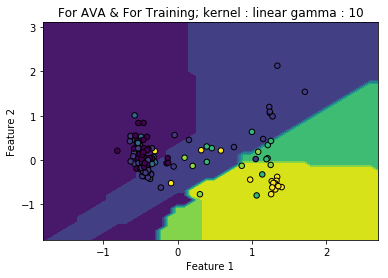

__________________________________________________
For gaussian kernel : AVA SVM 




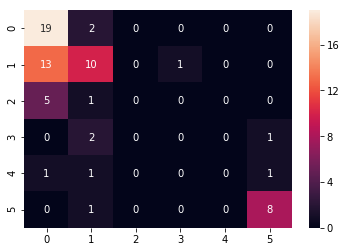

____________________________________________
Training acurracy :  0.6148648648648649  & Testing Accuracy :  0.5606060606060606


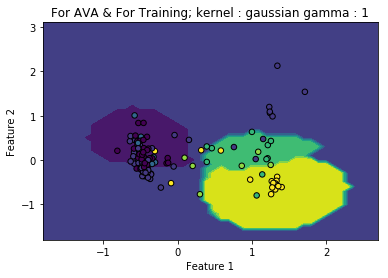

_________________________________________________




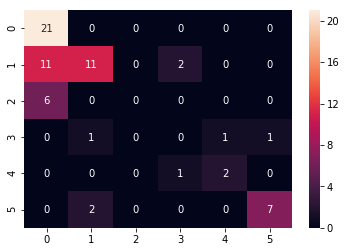

____________________________________________
Training acurracy :  0.7027027027027027  & Testing Accuracy :  0.6212121212121212


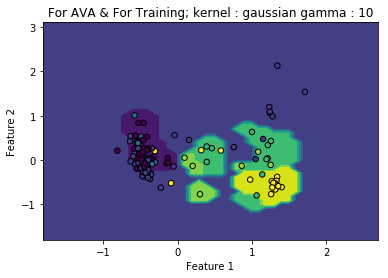

_________________________________________________




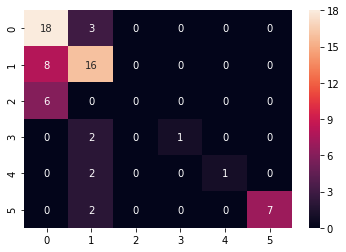

____________________________________________
Training acurracy :  0.8513513513513513  & Testing Accuracy :  0.6515151515151515


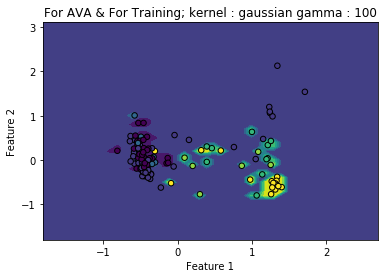

_________________________________________________




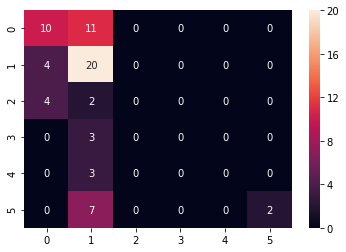

____________________________________________
Training acurracy :  0.9256756756756757  & Testing Accuracy :  0.48484848484848486


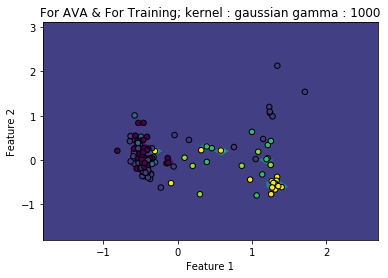

_________________________________________________




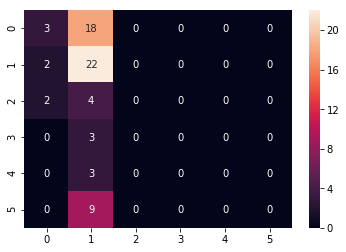

____________________________________________
Training acurracy :  0.9864864864864865  & Testing Accuracy :  0.3787878787878788


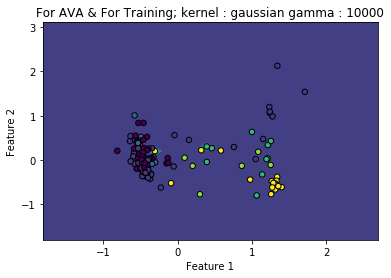

_________________________________________________


In [34]:
# For getting decision boundary
print("For linear kernel : AVA SVM ")
decision_boundary(train_data,train_label,test_data,test_label,"AVA",linear_kernel,10,True)
print("__________________________________________________")
list1 =[1,10,100,1000,10000]
print("For gaussian kernel : AVA SVM ")
for i in list1:
    
    decision_boundary(train_data,train_label,test_data,test_label,"AVA",gaussian_kernel,i,True)
    print("_________________________________________________")

# For testing data

In [ ]:
# For getting decision boundary
print("For linear kernel : Baseline SVM ")
decision_boundary(train_data,train_label,test_data,test_label,"Baseline",linear_kernel,10,False)
print("__________________________________________________")
list1 =[1,10,100,1000,10000]
print("For gaussian kernel : Baseline SVM ")
for i in list1:
    
    decision_boundary(train_data,train_label,test_data,test_label,"Baseline",gaussian_kernel,i,False)
    print("_________________________________________________")

In [ ]:
# For getting decision boundary
print("For linear kernel : OVA SVM ")
decision_boundary(train_data,train_label,test_data,test_label,"OVA",linear_kernel,10,False)
print("__________________________________________________")
list1 =[1,10,100,1000,10000]
print("For gaussian kernel : OVA SVM ")
for i in list1:
    
    decision_boundary(train_data,train_label,test_data,test_label,"OVA",gaussian_kernel,i,False)
    print("_________________________________________________")

In [ ]:
# For getting decision boundary
print("For linear kernel : AVA SVM ")
decision_boundary(train_data,train_label,test_data,test_label,"AVA",linear_kernel,10,False)
print("__________________________________________________")
list1 =[1,10,100,1000,10000]
print("For gaussian kernel : AVA SVM ")
for i in list1:
    
    decision_boundary(train_data,train_label,test_data,test_label,"AVA",gaussian_kernel,i,False)
    print("_________________________________________________")